In [1]:
### 이곳에서 과제를 진행해 주세요 ###
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/sample_data/creditcard.csv',encoding='cp949')

Mounted at /content/drive


In [2]:
# 필요ㅛ 할거 같은데 죄다 미리 import
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
%matplotlib inline

from sklearn import preprocessing as pp 
from scipy.stats import pearsonr 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import log_loss 
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier
from PIL import Image

In [7]:
df.shape # 제대로 업도르 되었는지 확인(284807, 31)

(284807, 31)

In [3]:
df.head



<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

In [4]:
#결측값 확인
df.isnull().sum()
#결측치 0으로 채우기
df.fillna(value =0,inplace=True)

In [5]:
df.shape

(284807, 31)

In [6]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
df.corr(method='pearson')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
pd.value_counts(df['Class'])

0    284315
1       492
Name: Class, dtype: int64

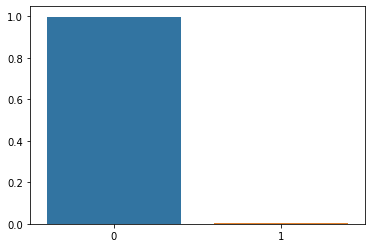

In [10]:
count_classes= pd.value_counts(df['Class'])
# 1이 사기 사례/0: 99.9 % 1: 0.172 % ......
ax= sns.barplot(x=count_classes.index, y=[count_classes[0]/len(df),count_classes[1]/len(df)])

## 사기 사례가 너무 적다!!!

## 선형로지스틱 회귀

In [11]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=2)
X_train = train.drop(['Class'], axis=1)
X_test = test.drop(['Class'], axis=1)
y_train = train['Class']
y_test = test['Class']

In [12]:
#class 분균형이 너무 심하기 떄문에 클래스에 레이블 비율 확인
print(y_train.value_counts()/y_train.shape[0])
print(y_test.value_counts()/y_test.shape[0])

0    0.998204
1    0.001796
Name: Class, dtype: float64
0    0.998432
1    0.001568
Name: Class, dtype: float64


In [13]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
225184,144140.0,-0.581460,0.950267,0.115938,-1.384767,1.388364,-1.595678,2.120867,-0.718954,-0.205211,...,-0.292792,0.153480,0.656548,-0.514192,0.077220,0.736220,-0.302469,-0.254862,-0.126279,12.82
116637,74369.0,0.686730,-0.785586,0.945092,1.476634,-1.191074,-0.193185,-0.217963,-0.011827,0.727172,...,0.388521,0.277960,0.419683,-0.314303,0.427369,0.426733,-0.285560,0.022906,0.079838,256.39
99414,67107.0,-0.848395,1.214313,0.954869,-0.030145,-0.177527,-0.851855,0.444232,0.369063,-1.005181,...,0.079630,0.205928,0.552455,-0.064845,0.590082,-0.271787,0.276440,0.217840,0.127724,16.44
217619,140965.0,-1.104465,0.616952,-0.878973,-0.312839,-0.092112,-0.020623,1.422463,0.442278,-0.406603,...,0.511897,0.265005,0.438796,0.413781,0.649776,-0.082746,0.520578,0.151103,0.216899,270.00
279878,169155.0,2.061985,-0.114758,-1.079406,0.427062,-0.229701,-1.241109,0.121975,-0.283331,0.679923,...,-0.284520,-0.299538,-0.772333,0.352777,0.021161,-0.330437,0.198512,-0.076625,-0.061905,1.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99536,67165.0,1.115051,0.365195,0.560599,2.336425,-0.120030,-0.014597,-0.044605,0.112345,-0.781409,...,-0.140582,-0.022610,-0.243446,-0.052200,-0.034171,0.403953,-0.051523,-0.023117,0.013575,30.43
163677,116144.0,-2.608128,-0.868360,1.751932,-3.763248,0.344494,2.125602,-1.033474,1.269861,3.358093,...,-0.193199,-0.031664,1.216082,-0.031446,-0.876106,1.140524,-0.599232,0.550036,-0.180385,16.29
184060,126074.0,-0.172016,1.292008,-0.355336,-0.294436,0.812615,-1.274763,1.113043,-0.317754,-0.065663,...,0.044552,0.295253,1.072505,-0.273931,-0.166118,-0.408608,-0.150201,0.339225,0.306371,2.08
283084,171363.0,-1.768834,-0.334117,1.244100,-1.104181,0.908234,-0.416612,0.952742,-0.027951,-0.411637,...,-0.201883,-0.082623,-0.041682,0.377946,-0.464996,0.847156,0.586125,-0.046036,-0.070882,86.90


## 로지스틱 회귀로 성능 확인, 베이스 모델

In [14]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score




In [15]:
# 평가지표 확인 함수
def show_metrics(y_test, y_pred): 
  confusion = confusion_matrix(y_test, y_pred) 
  accuracy = accuracy_score(y_test, y_pred) 
  precision = precision_score(y_test, y_pred) 
  recall = recall_score(y_test, y_pred) 
  f1=f1_score(y_test, y_pred)
  roc_auc=roc_auc_score(y_test,y_pred)
  print(confusion) 
  print("Acc : {}".format(accuracy)) 
  print("precision : {}".format(precision)) 
  print("recall : {}".format(recall))
  print("f1_score : {}".format(f1))
  print("roc_auc : {}".format(roc_auc))


In [16]:


logReg = LogisticRegression(random_state = 42)

logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
show_metrics(y_pred,y_test)


[[85253    36]
 [   56    98]]
Acc : 0.9989232587807076
precision : 0.7313432835820896
recall : 0.6363636363636364
f1_score : 0.6805555555555556
roc_auc : 0.8179707710362308


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [20]:
confusion_matrix(y_pred,y_test) 

array([[85253,    36],
       [   56,    98]])

## LightGBM 모델 써서 성능 비교

In [17]:
from lightgbm import LGBMClassifier

In [18]:
import time

In [19]:
# EDA전 
start_time = time.time()

lgbm = LGBMClassifier(n_estimators=1000, num_leaves=32, n_jobs=-1, boost_from_average=False)
lgbm.fit(X_train,y_train)
y_pred = lgbm.predict(X_test)
show_metrics(y_test,y_pred)

print("모델 수행 시간: %.1f 초" %(time.time()-start_time))

[[85303     6]
 [   23   111]]
Acc : 0.9996605924417448
precision : 0.9487179487179487
recall : 0.8283582089552238
f1_score : 0.8844621513944223
roc_auc : 0.9141439381997281
모델 수행 시간: 31.2 초


## LGBMclassifier\


## amount 시각화

(0.0, 5000.0)

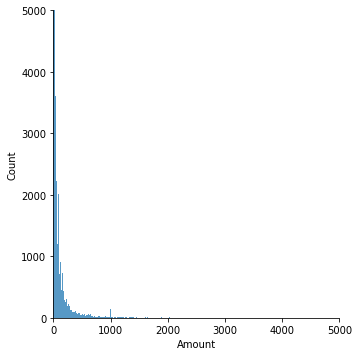

In [20]:
sns.displot(df['Amount'])
plt.ylim((0,5000))
plt.xlim((0,5000))

### 상당히 좌편향으로 되어 있음

In [25]:
X_train 

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
2426,-0.327544,-1.493109,1.504546,1.218875,0.741269,0.590354,0.542055,1.002090,-0.341592,1.036933,...,1.022453,0.862221,-0.334599,0.256465,-0.180672,-0.318639,0.096885,-0.288423,0.326771,-0.122804
273831,0.131193,1.882512,-1.246004,-1.261235,-2.214129,-0.652094,-0.455959,-0.548944,-0.031293,2.436652,...,1.353160,0.056249,0.290441,0.831404,-0.157292,-1.007042,0.088092,-0.711502,0.049068,-0.037816
111538,-0.344330,-2.616714,-1.670963,1.088904,0.562648,1.926064,-0.106636,-0.264908,0.587695,0.031149,...,-1.549212,-0.481909,-0.287822,-0.063602,2.187033,-0.769500,-0.073056,0.260426,0.475727,-0.153728
252280,1.217607,1.224944,-1.472840,-0.858202,0.569373,-0.740161,-0.142346,0.094122,-0.103440,0.781506,...,0.242557,0.639883,0.049060,-0.579501,-0.010561,-0.340668,-0.533698,-0.707276,-0.040171,0.024283
281542,1.181997,-1.791497,-0.051034,3.067529,3.683853,-1.830843,2.302404,0.733966,0.340065,0.162149,...,-0.742232,-0.458284,-0.023135,0.511261,-0.344378,0.066365,0.377551,0.283631,0.094240,0.074318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33867,-0.344330,1.256867,0.413152,0.322996,0.685660,-0.299566,-1.054102,0.141748,-0.249886,-0.090195,...,-0.203949,-0.028844,-0.278275,-0.763534,0.119647,0.367553,0.243484,0.091687,-0.017777,0.032565
84434,-0.281543,-1.093034,1.621979,1.334661,0.818556,-0.181152,-0.660391,0.597445,0.157340,-1.014495,...,0.516262,-0.052241,0.168755,0.318385,-0.346367,0.427942,0.537712,-0.221692,-0.309258,0.001913
95816,-0.049896,-0.799005,0.205982,1.512178,0.128515,-0.861328,0.635684,-0.432034,0.758099,0.452072,...,1.420343,0.117807,-0.042553,-0.139181,0.160084,-0.409871,-0.655866,1.078683,-0.021430,0.050234
203245,-0.301047,2.012512,-0.055116,-1.245330,0.272995,0.230934,-0.609708,0.207339,-0.220928,0.423374,...,0.668118,-0.149817,-0.199295,-0.377174,0.181837,-0.402258,-0.001667,-0.539438,-0.009090,-0.061492


#### 정규화 했다고 성능이 대단히 좋아진건 아님
### 로그 변환 진행 해보자
로그 변환: 라벨 분포가 심하게 왜곡된 경우에 사용
log 연산으로 매우 큰값도 작은 값으로 변환

In [21]:
import numpy as np

In [22]:
#로그변환 함수
def get_preprocessed_df_log(df): 
  res = df.copy() 
  amount_scaled = np.log1p(res["Amount"]) 
  res.insert(0, "Amount_Scaled", amount_scaled) 
  res.drop(["Time","Amount"], axis=1, inplace=True) 
  return res


In [23]:
# 데이터 셋 다시 나눔
# 걍 함수 만들자
def split_data(df):
  train, test = train_test_split(df, test_size=0.3, random_state=2)
  X_train = train.drop(['Class'], axis=1)
  X_test = test.drop(['Class'], axis=1)
  y_train = train['Class']
  y_test = test['Class']

  return X_train,X_test,y_train,y_test

In [31]:
#train, test = train_test_split(df, test_size=0.3, random_state=2)

In [32]:
#X_train,X_test,y_train,y_test=split_data(df)

In [24]:
train_l = get_preprocessed_df_log(train) # 변환
test_l=get_preprocessed_df_log(test)

In [25]:
train_l

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
2426,1.944481,-1.493109,1.504546,1.218875,0.741269,0.590354,0.542055,1.002090,-0.341592,1.036933,...,0.862221,-0.334599,0.256465,-0.180672,-0.318639,0.096885,-0.288423,0.326771,-0.122804,0
273831,4.802134,1.882512,-1.246004,-1.261235,-2.214129,-0.652094,-0.455959,-0.548944,-0.031293,2.436652,...,0.056249,0.290441,0.831404,-0.157292,-1.007042,0.088092,-0.711502,0.049068,-0.037816,0
111538,1.026042,-2.616714,-1.670963,1.088904,0.562648,1.926064,-0.106636,-0.264908,0.587695,0.031149,...,-0.481909,-0.287822,-0.063602,2.187033,-0.769500,-0.073056,0.260426,0.475727,-0.153728,0
252280,5.975335,1.224944,-1.472840,-0.858202,0.569373,-0.740161,-0.142346,0.094122,-0.103440,0.781506,...,0.639883,0.049060,-0.579501,-0.010561,-0.340668,-0.533698,-0.707276,-0.040171,0.024283,0
281542,5.952438,-1.791497,-0.051034,3.067529,3.683853,-1.830843,2.302404,0.733966,0.340065,0.162149,...,-0.458284,-0.023135,0.511261,-0.344378,0.066365,0.377551,0.283631,0.094240,0.074318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33867,1.026042,1.256867,0.413152,0.322996,0.685660,-0.299566,-1.054102,0.141748,-0.249886,-0.090195,...,-0.028844,-0.278275,-0.763534,0.119647,0.367553,0.243484,0.091687,-0.017777,0.032565,0
84434,2.917771,-1.093034,1.621979,1.334661,0.818556,-0.181152,-0.660391,0.597445,0.157340,-1.014495,...,-0.052241,0.168755,0.318385,-0.346367,0.427942,0.537712,-0.221692,-0.309258,0.001913,0
95816,4.336768,-0.799005,0.205982,1.512178,0.128515,-0.861328,0.635684,-0.432034,0.758099,0.452072,...,0.117807,-0.042553,-0.139181,0.160084,-0.409871,-0.655866,1.078683,-0.021430,0.050234,0
203245,2.611539,2.012512,-0.055116,-1.245330,0.272995,0.230934,-0.609708,0.207339,-0.220928,0.423374,...,-0.149817,-0.199295,-0.377174,0.181837,-0.402258,-0.001667,-0.539438,-0.009090,-0.061492,0


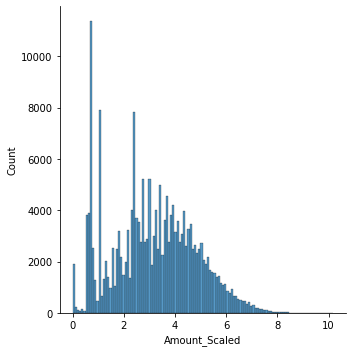

In [26]:
sns.displot(train_l['Amount_Scaled'])


In [27]:
train_l.drop(['V15','V27','V13'],axis=1,inplace=True) # 특성 중요도 확인하고 하위3개 드롭
test_l.drop(['V15','V27','V13'],axis=1,inplace=True) 

In [28]:
X_train=train_l.drop(['Class'],axis=1)
y_train=train_l['Class']

X_test=test_l.drop(['Class'],axis=1)
y_test=test_l['Class']

In [29]:

print("로그 변환 진행 후 로지스틱 회귀")
logReg = LogisticRegression()
logReg.fit(X_train,y_train)
y_pred = logReg.predict(X_test)
show_metrics(y_test,y_pred)
pred_train= logReg.predict(X_train)

로그 변환 진행 후 로지스틱 회귀
[[85296    13]
 [   41    93]]
Acc : 0.9993679997191109
precision : 0.8773584905660378
recall : 0.6940298507462687
f1_score : 0.775
roc_auc : 0.8469387317710524


In [30]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, y_pred)

(0.9991723681306555, 0.9993679997191109)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


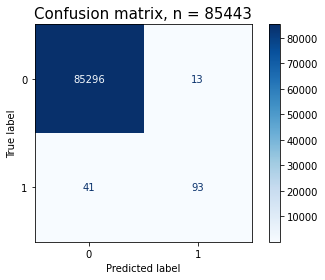

In [31]:
from sklearn.metrics import plot_confusion_matrix
fig,ax= plt.subplots()
pcm = plot_confusion_matrix(logReg,X_test,y_test,cmap=plt.cm.Blues,ax=ax)

plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize= 15)
plt.show()

In [32]:
print("로그변환 진행 후 LightGBM")
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=32, n_jobs=-1, boost_from_average=False)
lgbm.fit(X_train,y_train)
y_pred = lgbm.predict(X_test)

show_metrics(y_test,y_pred)

로그변환 진행 후 LightGBM
[[85303     6]
 [   25   109]]
Acc : 0.9996371850239341
precision : 0.9478260869565217
recall : 0.8134328358208955
f1_score : 0.8755020080321284
roc_auc : 0.9066812516325639


In [33]:
accuracy_score(y_train, pred_train), accuracy_score(y_test, y_pred)

(0.9991723681306555, 0.9996371850239341)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


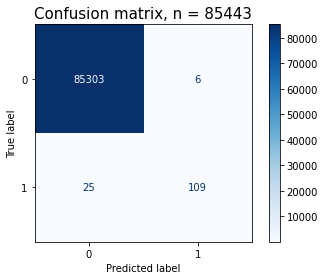

In [34]:
from sklearn.metrics import plot_confusion_matrix
fig,ax= plt.subplots()
pcm = plot_confusion_matrix(lgbm,X_test,y_test,cmap=plt.cm.Blues,ax=ax)

plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize= 15)
plt.show()

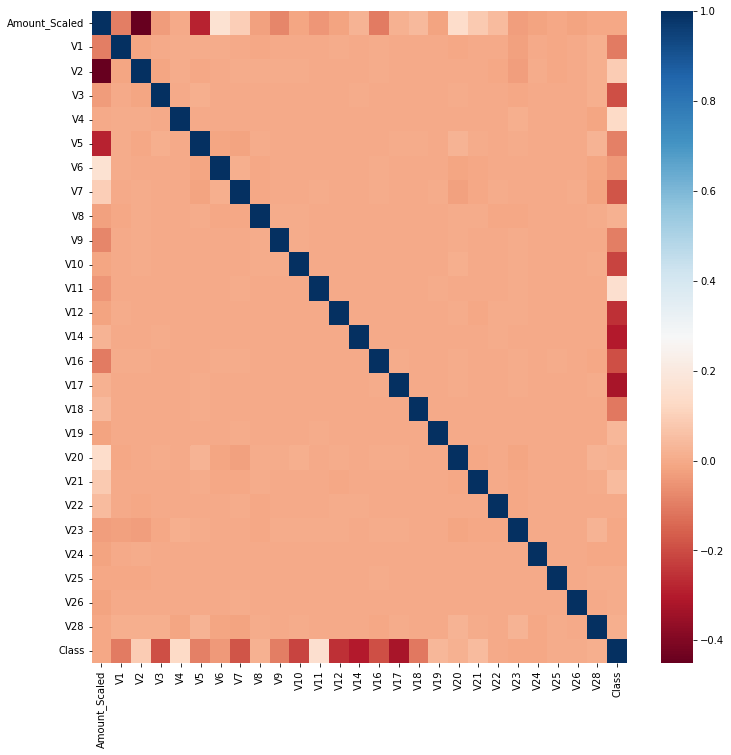

In [35]:

# 데이터 정리 하고 불필요 한 칼럼 드롭 한 이후 corr metric
plt.figure(figsize=(12,12))

sns.heatmap(train_l.corr(), cmap="RdBu")


### class 와 가장 강한 음의 상관 관계를 갖는것은 V12,V14,V17
-> 각각 이상치 제거 해보고 성능 확인 해보자\
최소+25% 까지, 최대-75% 까지

In [36]:
# 이상치 제거 함수 만들
def remove_outl(df,col,weight):
  cop= df.copy()
  fraud = cop[cop["Class"] == 1][col]
  q_25=np.percentile(fraud.values,25)
  q_75=np.percentile(fraud.values,75)
  iqr= q_75 - q_25

  iqr_weight=iqr * weight
  low_val=q_25-iqr_weight
  high_val=q_75-iqr_weight
  outlier_idx = fraud[(fraud < low_val) | (fraud > high_val)].index
  

  return outlier_idx



In [37]:
#V12
df_ll=train_l.copy()
index_V12= remove_outl(df_ll,"V12",1.5)
#V14

index_V14= remove_outl(df_ll,"V14",1.5)
#V16
#index_V17= remove_outl(df_l,"V17",1.5)


In [38]:

index_r= index_V12.union(index_V14)


In [91]:
index_r

Int64Index([   541,    623,   6108,   6329,   6336,   6338,   6446,   6529,
              6609,   6719,
            ...
            262826, 263324, 263877, 268375, 272521, 274475, 275992, 280143,
            280149, 281144],
           dtype='int64', length=336)

In [92]:
index_V12

Int64Index([167184,   6529,  41395, 214775, 124176,   6719,  15566,   6329,
            141258,  96341,
            ...
             68320, 125342, 157918, 243393, 143188, 198868,  69498,  26802,
            241445, 154587],
           dtype='int64', length=316)

In [93]:
index_V14

Int64Index([167184,   6529,  41395, 214775, 124176,   6719,  15566,   6329,
             96341,  46909,
            ...
             68320, 125342, 157918, 243393, 143188, 198868,  69498,  26802,
            241445, 154587],
           dtype='int64', length=317)

In [39]:
# V12 + V14 제거
train_l.drop(index_r,axis=0,inplace=True)

# V17 제거
#df_ll.drop(index_V14,axis=0,inplace=True)



In [40]:
df_ll=test_l.copy()
index_V12= remove_outl(df_ll,"V12",1.5)
#V14

index_V14= remove_outl(df_ll,"V14",1.5)
index_r= index_V12.union(index_V14)
test_l.drop(index_r,axis=0,inplace=True)


In [41]:
X_test = test_l.drop(['Class'], axis=1)

y_test = test_l['Class']

In [42]:
train_l

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V19,V20,V21,V22,V23,V24,V25,V26,V28,Class
2426,1.944481,-1.493109,1.504546,1.218875,0.741269,0.590354,0.542055,1.002090,-0.341592,1.036933,...,1.022453,0.862221,-0.334599,0.256465,-0.180672,-0.318639,0.096885,-0.288423,-0.122804,0
273831,4.802134,1.882512,-1.246004,-1.261235,-2.214129,-0.652094,-0.455959,-0.548944,-0.031293,2.436652,...,1.353160,0.056249,0.290441,0.831404,-0.157292,-1.007042,0.088092,-0.711502,-0.037816,0
111538,1.026042,-2.616714,-1.670963,1.088904,0.562648,1.926064,-0.106636,-0.264908,0.587695,0.031149,...,-1.549212,-0.481909,-0.287822,-0.063602,2.187033,-0.769500,-0.073056,0.260426,-0.153728,0
252280,5.975335,1.224944,-1.472840,-0.858202,0.569373,-0.740161,-0.142346,0.094122,-0.103440,0.781506,...,0.242557,0.639883,0.049060,-0.579501,-0.010561,-0.340668,-0.533698,-0.707276,0.024283,0
281542,5.952438,-1.791497,-0.051034,3.067529,3.683853,-1.830843,2.302404,0.733966,0.340065,0.162149,...,-0.742232,-0.458284,-0.023135,0.511261,-0.344378,0.066365,0.377551,0.283631,0.074318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33867,1.026042,1.256867,0.413152,0.322996,0.685660,-0.299566,-1.054102,0.141748,-0.249886,-0.090195,...,-0.203949,-0.028844,-0.278275,-0.763534,0.119647,0.367553,0.243484,0.091687,0.032565,0
84434,2.917771,-1.093034,1.621979,1.334661,0.818556,-0.181152,-0.660391,0.597445,0.157340,-1.014495,...,0.516262,-0.052241,0.168755,0.318385,-0.346367,0.427942,0.537712,-0.221692,0.001913,0
95816,4.336768,-0.799005,0.205982,1.512178,0.128515,-0.861328,0.635684,-0.432034,0.758099,0.452072,...,1.420343,0.117807,-0.042553,-0.139181,0.160084,-0.409871,-0.655866,1.078683,0.050234,0
203245,2.611539,2.012512,-0.055116,-1.245330,0.272995,0.230934,-0.609708,0.207339,-0.220928,0.423374,...,0.668118,-0.149817,-0.199295,-0.377174,0.181837,-0.402258,-0.001667,-0.539438,-0.061492,0


In [44]:
X_train = train_l.drop(['Class'], axis=1)

y_train = train_l['Class']

In [45]:
y_train

2426      0
273831    0
111538    0
252280    0
281542    0
         ..
33867     0
84434     0
95816     0
203245    0
100879    0
Name: Class, Length: 199028, dtype: int64

In [100]:
X_train

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V28
2426,1.944481,-1.493109,1.504546,1.218875,0.741269,0.590354,0.542055,1.002090,-0.341592,1.036933,...,-0.179769,1.022453,0.862221,-0.334599,0.256465,-0.180672,-0.318639,0.096885,-0.288423,-0.122804
273831,4.802134,1.882512,-1.246004,-1.261235,-2.214129,-0.652094,-0.455959,-0.548944,-0.031293,2.436652,...,1.383409,1.353160,0.056249,0.290441,0.831404,-0.157292,-1.007042,0.088092,-0.711502,-0.037816
111538,1.026042,-2.616714,-1.670963,1.088904,0.562648,1.926064,-0.106636,-0.264908,0.587695,0.031149,...,-1.930151,-1.549212,-0.481909,-0.287822,-0.063602,2.187033,-0.769500,-0.073056,0.260426,-0.153728
252280,5.975335,1.224944,-1.472840,-0.858202,0.569373,-0.740161,-0.142346,0.094122,-0.103440,0.781506,...,0.280581,0.242557,0.639883,0.049060,-0.579501,-0.010561,-0.340668,-0.533698,-0.707276,0.024283
281542,5.952438,-1.791497,-0.051034,3.067529,3.683853,-1.830843,2.302404,0.733966,0.340065,0.162149,...,0.333641,-0.742232,-0.458284,-0.023135,0.511261,-0.344378,0.066365,0.377551,0.283631,0.074318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33867,1.026042,1.256867,0.413152,0.322996,0.685660,-0.299566,-1.054102,0.141748,-0.249886,-0.090195,...,-0.398653,-0.203949,-0.028844,-0.278275,-0.763534,0.119647,0.367553,0.243484,0.091687,0.032565
84434,2.917771,-1.093034,1.621979,1.334661,0.818556,-0.181152,-0.660391,0.597445,0.157340,-1.014495,...,0.026312,0.516262,-0.052241,0.168755,0.318385,-0.346367,0.427942,0.537712,-0.221692,0.001913
95816,4.336768,-0.799005,0.205982,1.512178,0.128515,-0.861328,0.635684,-0.432034,0.758099,0.452072,...,-0.446101,1.420343,0.117807,-0.042553,-0.139181,0.160084,-0.409871,-0.655866,1.078683,0.050234
203245,2.611539,2.012512,-0.055116,-1.245330,0.272995,0.230934,-0.609708,0.207339,-0.220928,0.423374,...,-0.197015,0.668118,-0.149817,-0.199295,-0.377174,0.181837,-0.402258,-0.001667,-0.539438,-0.061492


In [101]:
X_test

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V18,V19,V20,V21,V22,V23,V24,V25,V26,V28
225184,2.626117,-0.581460,0.950267,0.115938,-1.384767,1.388364,-1.595678,2.120867,-0.718954,-0.205211,...,-0.556389,-1.079364,-0.292792,0.153480,0.656548,-0.514192,0.077220,0.736220,-0.302469,-0.126279
116637,5.550592,0.686730,-0.785586,0.945092,1.476634,-1.191074,-0.193185,-0.217963,-0.011827,0.727172,...,0.242700,-0.510567,0.388521,0.277960,0.419683,-0.314303,0.427369,0.426733,-0.285560,0.079838
99414,2.858766,-0.848395,1.214313,0.954869,-0.030145,-0.177527,-0.851855,0.444232,0.369063,-1.005181,...,0.216478,0.127922,0.079630,0.205928,0.552455,-0.064845,0.590082,-0.271787,0.276440,0.127724
217619,5.602119,-1.104465,0.616952,-0.878973,-0.312839,-0.092112,-0.020623,1.422463,0.442278,-0.406603,...,1.046626,-0.029761,0.511897,0.265005,0.438796,0.413781,0.649776,-0.082746,0.520578,0.216899
279878,0.828552,2.061985,-0.114758,-1.079406,0.427062,-0.229701,-1.241109,0.121975,-0.283331,0.679923,...,-0.760068,0.149122,-0.284520,-0.299538,-0.772333,0.352777,0.021161,-0.330437,0.198512,-0.061905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99536,3.447763,1.115051,0.365195,0.560599,2.336425,-0.120030,-0.014597,-0.044605,0.112345,-0.781409,...,0.447984,-0.594462,-0.140582,-0.022610,-0.243446,-0.052200,-0.034171,0.403953,-0.051523,0.013575
163677,2.850128,-2.608128,-0.868360,1.751932,-3.763248,0.344494,2.125602,-1.033474,1.269861,3.358093,...,-0.317836,-0.352390,-0.193199,-0.031664,1.216082,-0.031446,-0.876106,1.140524,-0.599232,-0.180385
184060,1.124930,-0.172016,1.292008,-0.355336,-0.294436,0.812615,-1.274763,1.113043,-0.317754,-0.065663,...,0.740403,-0.060549,0.044552,0.295253,1.072505,-0.273931,-0.166118,-0.408608,-0.150201,0.306371
283084,4.476200,-1.768834,-0.334117,1.244100,-1.104181,0.908234,-0.416612,0.952742,-0.027951,-0.411637,...,0.270545,-0.036004,-0.201883,-0.082623,-0.041682,0.377946,-0.464996,0.847156,0.586125,-0.070882


In [46]:

print("이상치 제거 후 로지스틱 회귀")
logReg = LogisticRegression()
logReg.fit(X_train,y_train)
y_pred_train = logReg.predict(X_train)
y_pred = logReg.predict(X_test)
show_metrics(y_test,y_pred)
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)

이상치 제거 후 로지스틱 회귀


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[85309     0]
 [    0    11]]
Acc : 1.0
precision : 1.0
recall : 1.0
f1_score : 1.0
roc_auc : 1.0


(1.0, 1.0)

In [47]:
print("이상치 제거 후 LightGBM")
lgbm = LGBMClassifier(min_data_in_leaf=20,class_weight='balanced' ,boost_from_average=False)
lgbm.fit(X_train,y_train)
y_pred = lgbm.predict(X_test)
show_metrics(y_test,y_pred)

y_pred_train = lgbm.predict(X_train)
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)

이상치 제거 후 LightGBM
[[85307     2]
 [    4     7]]
Acc : 0.999929676511955
precision : 0.7777777777777778
recall : 0.6363636363636364
f1_score : 0.7000000000000001
roc_auc : 0.8181700960891902


(1.0, 0.999929676511955)

## class=1 인 수가 너무 적어서 뭘해도 과적합으로 나옴 
### -> 오버샘플링 하자

## 오버 샘플링

In [48]:
! pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
!pip install -U imbalanced-learn==0.6.2

!pip install -U scikit-learn==0.22.2



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 163 kB 5.1 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.1 MB 4.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22.2 which is incompatible.


In [51]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=100) 
X_train_over,y_train_over= smote.fit_resample(X_train,y_train)

print("berfore smote : ",X_train.shape, y_train.shape) 
print("after smote : ", X_train_over.shape, y_train_over.shape) 
print("label distribution after smote \n", pd.Series(y_train_over).value_counts())


berfore smote :  (199028, 26) (199028,)
after smote :  (398012, 26) (398012,)
label distribution after smote 
 0    199006
1    199006
Name: Class, dtype: int64


- 모델링을 어떤식으로 할까 
- 모델링 하면서 추가적으로 EDA 도 진행 해야 함


- 결정 트리 모델, 랜덤 포레스트 모델(파이프 라인 사용)
- 랜덤 포레스트 하면서 특성 중요도 계산
- k겹 교차 검증 해보기
https://guru.tistory.com/36

- 처음에는 하이퍼 파라미터 손대지 말고 해보고
- (Randomized Search CV) 사용
- 그 뒤에 하이퍼 파라미터 조정

In [55]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [56]:
def k_fold_cv(X_train,y_train,pipe):
 
  k = 3

  scores = cross_val_score(pipe, X_train, y_train, cv=k, 
                         scoring='f1') #

  print(f'f1 for {k} folds:', scores)

In [57]:
# decision tree 
from sklearn.tree import DecisionTreeClassifier


#Decision Tree 모델 생성
model_tree = DecisionTreeClassifier(random_state = 42)

#Test 데이터 학습
model_tree = model_tree.fit(X_train_over, y_train_over)

#X_test 데이터를 사용해 y_test 타겟 레이블 예측
tree_pred = model_tree.predict(X_test)

show_metrics(y_test,tree_pred)

#print("dicision tree 모델 수행 시간: %.1f 초" %(time.time()-start_time))
tree_pipe = make_pipeline(
  model_tree
)
k_fold_cv(X_train_over, y_train_over,tree_pipe)

[[85308     1]
 [    0    11]]
Acc : 0.9999882794186592
precision : 0.9166666666666666
recall : 1.0
f1_score : 0.9565217391304348
roc_auc : 0.9999941389536859
f1 for 3 folds: [1.         0.99999246 1.        ]


[[85309     0]
 [    3     8]]
Acc : 0.9999648382559775
precision : 1.0
recall : 0.7272727272727273
f1_score : 0.8421052631578948
roc_auc : 0.8636363636363636
f1 for 3 folds: [0.99999246 0.99999246 1.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


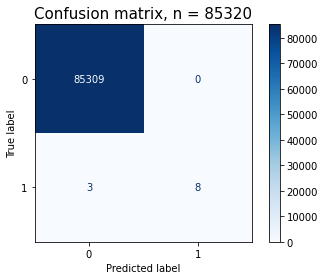

In [58]:
#LGBM

#n_estimators=1000, num_leaves=32, n_jobs=-1, boost_from_average=False
lgbm = LGBMClassifier()
lgbm.fit(X_train_over,y_train_over)
LGBM_pred = lgbm.predict(X_test)
show_metrics(y_test,LGBM_pred)
lgbm_pipe = make_pipeline(
  lgbm
)
k_fold_cv(X_train_over, y_train_over,lgbm_pipe)

from sklearn.metrics import plot_confusion_matrix
fig,ax= plt.subplots()
pcm = plot_confusion_matrix(lgbm,X_test,y_test,cmap=plt.cm.Blues,ax=ax)

plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize= 15)
plt.show()

In [59]:
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred)

(1.0, 0.999929676511955)

In [112]:
# 랜덤포레스트 사용
"""
n_estimators = 10 # 결정트리의 갯수
max_features = 'auto' # 루트 피쳐 개수 만큼 지정
max_depth = None  # 트리의 최대 깊이 (완벽하게 클래스가 결정될 때까지 분할)
min_samples_split = 2  # 노드를 분할하기 위한 최소한의 샘플 데이터 수
min_samples_leaf = 1  # 리프 노드에 있어야 할 최소 샘플 수
min_weight_fraction_leaf = 0.0 # min_sample_leaf와 같지만 가중치가 부여된 샘플 수에서의 비율
max_leaf_nodes = None  # 리프노드의 최대 개수
bootstrap = True  # 붓스트랩 기법 유무
oob_score = False # 일반화 정확도를 줄이기 위해 밖의 샘플 사용 여부
n_jobs = -1  # 시스템적인 요소
random_state = 2018
class_weight = 'balanced'  # 불균형 class인 경우 사용
"""
"""
n_estimators=n_estimators, 
        max_features=max_features, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap, 
        oob_score=oob_score, n_jobs=n_jobs, random_state=random_state, 
        class_weight=class_weight
        """
#Random Forest 모델 생성
model_forest = RandomForestClassifier(random_state = 42)

#Test 데이터 학습
model_forest = model_forest.fit(X_train_over, y_train_over)

#X_test 데이터를 사용해 y_test 타겟 레이블 예측
forest_pred = model_forest.predict(X_test)


show_metrics(y_test,forest_pred)
forest_pipe = make_pipeline(
  model_forest
)

k_fold_cv(X_train_over,y_train_over,forest_pipe)

[[85309     0]
 [    1    10]]
Acc : 0.9999882794186592
precision : 1.0
recall : 0.9090909090909091
f1_score : 0.9523809523809523
roc_auc : 0.9545454545454546
f1 for 3 folds: [1. 1. 1.]


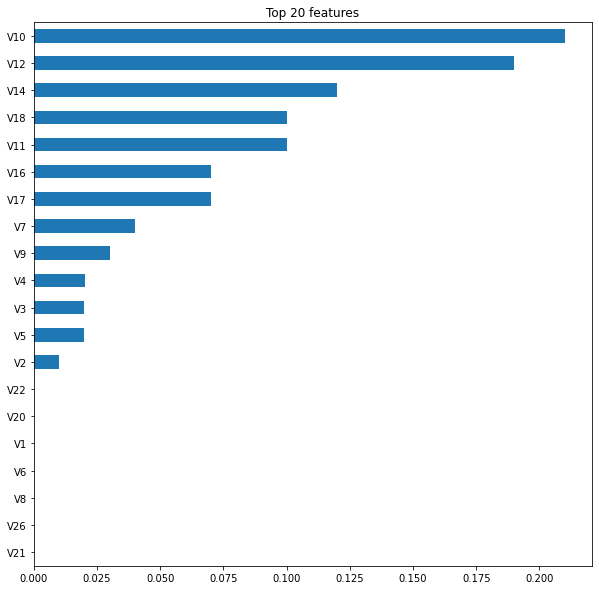

In [113]:
# 특성 중요도
rf = model_forest
importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [ ]:
# 쓸데 없는 피쳐 드롭하자
#위에 것이 드롭 진행 한 이후 특성 중요도 검사 한겁니당

In [61]:
#검증곡선, rand CV 진행
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV

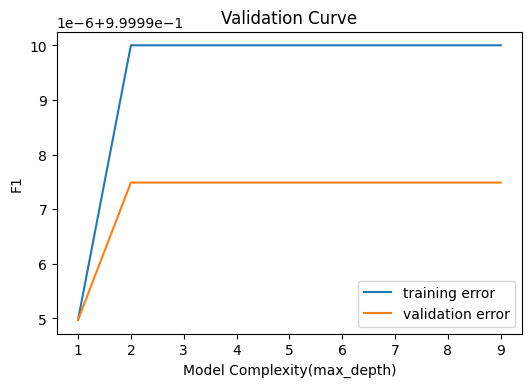

In [115]:
#결정tree
depth = range(1,10)
ts, vs = validation_curve(
    tree_pipe, X_train_over, y_train_over
    , param_name='decisiontreeclassifier__max_depth'
    , param_range=depth, scoring='f1'
    , cv=3
    
)
train_scores_mean = np.mean(ts, axis=1)
validation_scores_mean = np.mean(vs, axis=1)

fig, ax = plt.subplots()

# 훈련세트 검증곡선
ax.plot(depth, train_scores_mean, label='training error')

# 검증세트 검증곡선
ax.plot(depth, validation_scores_mean, label='validation error')


# 그래프 셋팅
ax.set(title='Validation Curve'
      , xlabel='Model Complexity(max_depth)', ylabel='F1')
ax.legend()
fig.dpi = 100


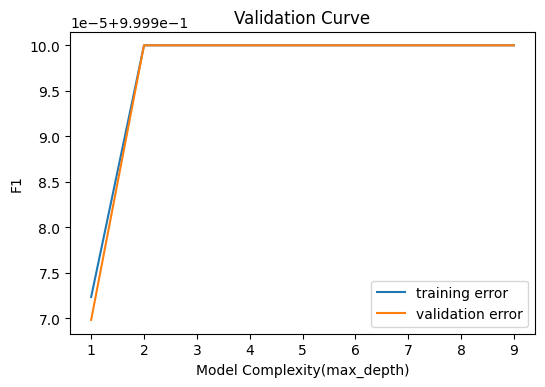

In [116]:
#랜덤forrest
depth = range(1,10)
ts, vs = validation_curve(
    forest_pipe, X_train_over, y_train_over
    , param_name='randomforestclassifier__max_depth'
    , param_range=depth, scoring='f1'
    , cv=3

)
train_scores_mean = np.mean(ts, axis=1)
validation_scores_mean = np.mean(vs, axis=1)

fig, ax = plt.subplots()

# 훈련세트 검증곡선
ax.plot(depth, train_scores_mean, label='training error')

# 검증세트 검증곡선
ax.plot(depth, validation_scores_mean, label='validation error')


# 그래프 셋팅
ax.set(title='Validation Curve'
      , xlabel='Model Complexity(max_depth)', ylabel='F1')
ax.legend()
fig.dpi = 100


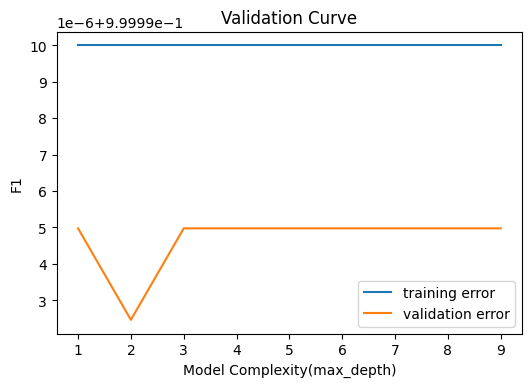

In [117]:
#LGBM

depth = range(1,10)
ts, vs = validation_curve(
    lgbm_pipe, X_train_over, y_train_over
    , param_name='lgbmclassifier__max_depth'
    , param_range=depth, scoring='f1'
    ,cv=3
    
)
train_scores_mean = np.mean(ts, axis=1)
validation_scores_mean = np.mean(vs, axis=1)

fig, ax = plt.subplots()

# 훈련세트 검증곡선
ax.plot(depth, train_scores_mean, label='training error')

# 검증세트 검증곡선
ax.plot(depth, validation_scores_mean, label='validation error')


# 그래프 셋팅
ax.set(title='Validation Curve'
      , xlabel='Model Complexity(max_depth)', ylabel='F1')
ax.legend()
fig.dpi = 100



In [118]:
#Rand CV 실행
#결정트리
start_time = time.time()
tree= DecisionTreeClassifier(random_state = 42)

dists = {
    
    'max_depth': [2,3,5,7], 
    'min_samples_leaf': [5,10,15,20] 
    
}

clf = RandomizedSearchCV(
    tree, 
    param_distributions=dists, 
    n_iter=5, 
    cv=3
  
   
)

clf.fit(X_train_over, y_train_over);

print("모델 수행 시간: %.1f 초" %(time.time()-start_time))

모델 수행 시간: 36.1 초


In [119]:
pred_train = clf.predict(X_train_over)
pred_test = clf.predict(X_test)

In [120]:
accuracy_score(y_train_over, pred_train), accuracy_score(y_test, pred_test)

(0.9999949750258786, 0.9999882794186592)

In [121]:
clf.best_params_ #최적의 파라미터 조회

{'max_depth': 5, 'min_samples_leaf': 5}

In [122]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [ ]:
pd.DataFrame(clf.cv_results_)

In [123]:
#Rand CV 실행
#랜덤포레스트
start_time = time.time()
tree= RandomForestClassifier(random_state = 42)

dists = {
   
    'max_depth': [3, 5, 7, 10], 
    'max_features': [2,4,6,8],
    'min_samples_leaf': [5,10,15,20] 
    
}

clf = RandomizedSearchCV(
    tree, 
    param_distributions=dists, 
    n_iter=5, 
    cv=3
  
   
)

clf.fit(X_train_over, y_train_over);

print("모델 수행 시간: %.1f 초" %(time.time()-start_time))

모델 수행 시간: 737.7 초


In [ ]:
pred_train = clf.predict(X_train_over)
pred_test = clf.predict(X_test)

In [ ]:
accuracy_score(y_train_over, pred_train), accuracy_score(y_test, pred_test)

In [ ]:
clf.best_params_ 

In [ ]:
clf.best_estimator_

In [ ]:
pipe = clf.best_estimator_

In [ ]:
from sklearn.metrics import f1_score

y_pred = pipe.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'테스트세트 f1: {f1:,.0f}')

In [62]:
#LGBM
start_time = time.time()
lgbm= LGBMClassifier()

dists = {
    
    'max_depth': range(1,30,5), 
    'num_leaves':[2,4,6,8],
    'min_data_in_leaf':[5,10,15,20]
}

clf = RandomizedSearchCV(
    lgbm, 
    param_distributions=dists, 
    n_iter=5, 
    cv=3
  
   
)

clf.fit(X_train_over, y_train_over);

print("모델 수행 시간: %.1f 초" %(time.time()-start_time))

모델 수행 시간: 60.0 초


In [63]:
pred_train = clf.predict(X_train_over)
pred_test = clf.predict(X_test)

In [64]:
accuracy_score(y_train_over, pred_train), accuracy_score(y_test, pred_test)

(1.0, 1.0)

In [65]:
clf.best_params_

{'max_depth': 16, 'min_data_in_leaf': 15, 'num_leaves': 4}

In [66]:
pipe = clf.best_estimator_

In [67]:
from sklearn.metrics import f1_score

y_pred = pipe.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'테스트세트 f1: {f1:,.0f}')

테스트세트 f1: 1


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


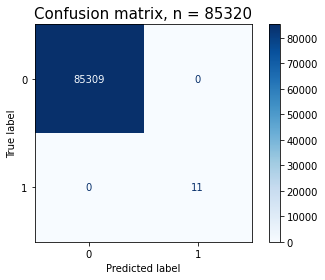

In [68]:
from sklearn.metrics import plot_confusion_matrix
fig,ax= plt.subplots()
pcm = plot_confusion_matrix(pipe,X_test,y_test,cmap=plt.cm.Blues,ax=ax)

plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize= 15)
plt.show()

## LGBM 하이퍼 파라미터 조정

In [ ]:
# 조정 하려고 했으나 할 수록 .... 성능이 안좋아져서 ........